In [1]:
# -*- coding: utf-8 -*-

# Il faut installé graphviz et scipy
# %pip install graphviz scipy


## DM : GÉNÉRATION ALÉATOIRE UNIFORME

#### Nom : Ahmat
#### Prénom : Mahamat Ahmat
#### Numéro étudiant : 21 91 29 49
***

*Le but de ce devoir est d’étudier et de programmer un générateur uniforme pour les arbres hexabinaires.*
***
Un arbre plan est dit hexabinaire si tout nœud de l’arbre a 0 enfant (ce qui s’appelle une feuille) ou 2 enfants ou 6 enfants. On définit ici la taille d’un arbre hexabinaire comme le nombre de nœuds internes (i.e. nœuds différents d’une feuille).
***

>### PARTIE THÉORIQUE
***

**Question 1**. Combien y a-t-il d’arbres hexabinaires de taille 2 ?

**$\color{green}{\text{Réponse 1}}$** :
     
Il y a 16 arbres hexabinaires de taille 2
***

**Question 2**. Décrire une spécification combinatoire pour les arbres hexabinaires. En déduire une équation satisfaite par leur série génératrice.

**$\color{green}{\text{Réponse 2}}$** :

![Spécification des arbres Hexabinaires](./images/H.png "Spécification des arbres Hexabinaires")

De cette spécification, on en déduit l'équation satisfaite par la série génératrice des arbres hexabinaires

D'où $$ H(z) = 1 + z*H(z)^2 + z*H(z)^6 $$
***

On considère **C** la classe combinatoire des chemins commençant en (0, 0), restant à une altitude positive, terminant sur l’axe des abscisses (altitude 0), et utilisant des pas montants (+5, +1), (+1, +1) et des pas descendants (−1, +1). La taille d’un élément de **C** est son nombre de pas montants.
***

**Question 3**. Montrer que C et les arbres hexabinaires sont comptés par les mêmes nombres. Pour cela, on pourra soit chercher une bijection entre les deux classes combinatoires, soit montrer que C satisfait la même spécification combinatoire que les arbres hexabinaires. (La méthode est selon votre préférence.)

**$\color{green}{\text{Réponse 3}}$** :

![Spécification de la classe combinatoire **C**](./images/C.png "Spécification de la classe combinatoire **C**")

De cette spécification, on en déduit l'équation satisfaite par la série génératrice de la classe **C**.

D'où $$ C(z) = 1 + z*C(z)^2 + z*C(z)^6 $$

Par conséquent, la classe **C** et les arbres **Hexabinaires** sont comptés par les mêmes nombres, car ils ont la même la même spécification

***

**Question 4**. Pouvez-vous trouver une formule close pour le nombre d’arbres hexabinaires de taille n ?

**$\color{green}{\text{Réponse 4}}$** :

#### **Formule close pour le nombre d'arbres hexabinaires $(H_n)$**

Nous avons l'équation fonctionnelle suivante définissant les **arbres hexabinaires** :

$$ H(z) = 1 + z*H(z)^2 + z*H(z)^6 $$



### **Étape 1 : Transformation de l'équation**
Définissons :

$$ C(z) = H(z) - 1 	\Longrightarrow H(z) = C(z) + 1 $$

Ainsi, l’équation devient :

$$ C(z) = z * [(C(z) + 1)^2 + (C(z) + 1)^6] $$

Nous introduisons une nouvelle fonction $ \Phi(w) $ :

$$ w = z \cdot \Phi(w) $$

où :

$$ \Phi(w) = (w+1)^2 + (w+1)^6 $$


### **Étape 2 : Extraction des coefficients**
Nous cherchons l'expression des coefficients de la série génératrice $H(z)$.
Nous avons :

$$ [z^n]H(z) = \frac{1}{n} [w^{n-1}] \Phi(w)^n $$

$$ \Phi(w)^n = [(w+1)^2 + (w+1)^6]^n $$

En développant avec le **binôme de Newton**, nous obtenons :

$$ \Phi(w)^n = \sum_{k=0}^{n} \binom{n}{k} (w+1)^{2n-2k} (w+1)^{6k} $$

$$ \Phi(w)^n = \sum_{k=0}^{n} \binom{n}{k} (w+1)^{2n + 4k} $$

$$ \Phi(w)^n = \sum_{k=0}^{n} \binom{n}{k} \sum_{i=0}^{2n + 4k} \binom{2n+4k}{i} w^{2n + 4k - i} $$


Pour trouver le **coefficient de $ w^{n-1} $** on a :

$$ 2n + 4k - i = n - 1 \Longrightarrow i = n + 4k + 1$$

D'où la formule clause **$(H_n)$** est donnée par :

$$ H_n = \frac{1}{n} \sum_{k=0}^{n} \binom{n}{k} \binom{2n + 4k}{n + 4k + 1} $$

***

***

> ### PARTIE PRATIQUE
***

**Question 5**. Définir une classe pour les arbres hexabinaires.

**$\color{green}{\text{Réponse 5}}$** :

voir le fichier **ArbreHexabinaire.py**
***

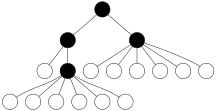


Les 10 premiers nombres des arbres Hexabinaire

[1, 2, 16, 192, 2720, 42224, 694848, 11907648, 210240256, 3797869056]


In [2]:
from helpers import draw_tree_unlabelled
from ArbreHexabinaire import *

root = HexabinaryTree()  # Racine
node1 = HexabinaryTree()  # Premier nœud enfant de la racine
node2 = HexabinaryTree()  # Deuxième nœud enfant de la racine
node3 = HexabinaryTree()  # Nœud enfant de node1
node3.add_children([HexabinaryTree() for _ in range(6)])
node2.add_children([HexabinaryTree() for _ in range(6)])
node1.add_children([HexabinaryTree(), node3])
root.add_children([node1, node2])

#print(root)
draw_tree_unlabelled(tree=root)
print("\nLes 10 premiers nombres des arbres Hexabinaire\n")
print(coefficients_hexa_tree(9))

***

**Question 6**. Écrire un algorithme de génération uniforme pour les arbres hexabinaires.

**$\color{green}{\text{Réponse 6}}$** :

voir le fichier **GenerateurUniformeHex.py**
***

Arbre hexabinaire généré : 
Taille = 2


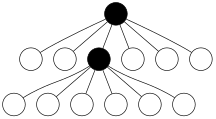

In [3]:
from GenerateurUniformeHex import *
from helpers import draw_tree_unlabelled

n = 2 # Taille de l'arbre à générer
generator = UniformHexabinaryGenerator(n)
arbre = generator.generate()
#print(f"Arbre hexabinaire généré : {arbre}")
#print(f"Chemin généré : {arbre.tree_to_path()}")
print(f"Arbre hexabinaire généré : \nTaille = {arbre.size}")
draw_tree_unlabelled(tree=arbre)

**Question 7**. Écrire un générateur de Boltzmann pour les arbres hexabinaires. (Ne pas oublier de préciser la valeur maximale du paramètre.)

**$\color{green}{\text{Réponse 7}}$** :

voir le fichier **GenerateurDeBolthmann.py**

$rayon-de-convergence = 0.04651941284485908$
***

426 tirages nécessaires pour obtenir un arbre de taille 3
Arbre hexabinaire généré : 
Taille = 3


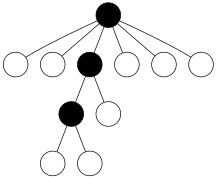

In [4]:
from GenerateurDeBolthmann import *
from helpers import draw_tree_unlabelled

generator = BoltzmannGenerator()
rayon_de_convergence = 0.04651941284485908
z = 0.04 # z <= rayon_de_convergence
n = 3
arbre = generator.tree_of_size_n(z,n)
print(f"Arbre hexabinaire généré : \nTaille = {arbre.size}")
draw_tree_unlabelled(tree=arbre)

### Références

- **L'affichage des arbres est inspiré de ce repo GitHub**  
  [Alea2023Notebooks - Génération uniforme](https://github.com/CarinePivoteau/Alea2023Notebooks/blob/main/helpers.py)


Merci énormément pour ce DM ! j'ai pu apprendre beaucoup de choses. 

J'ai passé trois semaines à m'acharner sur la formule clause à cause d'une petite erreur, mais au final, j'ai fini par la repérer !